<!--<img width=700px; src="../img/logoUPSayPlusCDS_990.png"> -->

<p style="margin-top: 3em; margin-bottom: 2em;"><b><big><big><big><big>Introduccion a Pandas</big></big></big></big></b></p>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 8

# 1. Empecemos con un showcase

#### Case 1: titanic survival data

In [8]:
df = pd.read_csv("data/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Comenzando por leer este conjunto de datos, para responder preguntas sobre estos datos en unas pocas líneas de código:

**¿Cuál es la distribución por edades de los pasajeros?**

<AxesSubplot:>

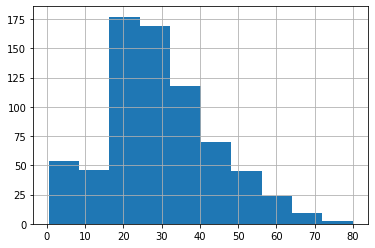

In [4]:
df['Age'].hist()

**¿En qué se diferencia la tasa de supervivencia de los pasajeros entre sexos?**

In [5]:
df.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))

,Survived
Sex,
female,0.742038
male,0.188908


**¿O en qué se diferencia entre las diferentes clases?**

<AxesSubplot:xlabel='Pclass'>

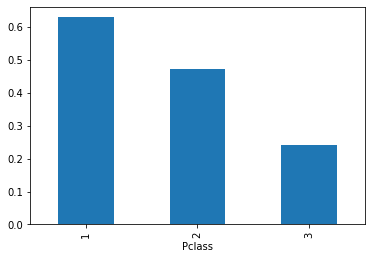

In [6]:
df.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

Toda la funcionalidad necesaria para los ejemplos anteriores se explicará a lo largo de este tutorial.

#### Case 2: air quality measurement timeseries

AirBase (la base de datos europea sobre la calidad del aire): mediciones por hora de todas las estaciones de control de la calidad del aire de Europa

A partir de estos datos horarios para diferentes estaciones:

In [9]:
data = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

In [10]:
data.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


para responder preguntas sobre estos datos en unas pocas líneas de código:

**¿La contaminación del aire muestra una tendencia decreciente a lo largo de los años?**

In [ ]:
data['1999':].resample('M').mean().plot(ylim=[0,120])

In [ ]:
data['1999':].resample('A').mean().plot(ylim=[0,100])

**¿Cuál es la diferencia de perfil diurno entre días laborables y fines de semana?**

In [ ]:
data['weekday'] = data.index.weekday
data['weekend'] = data['weekday'].isin([5, 6])
data_weekend = data.groupby(['weekend', data.index.hour])['BASCH'].mean().unstack(level=0)
data_weekend.plot()

Volveremos a estos ejemplos y los construiremos paso a paso.

# 2. Pandas: data analysis in python

Para el trabajo intensivo de datos en Python, la biblioteca [Pandas] (http://pandas.pydata.org) se ha vuelto esencial.

Que es `pandas`?

* Pandas se puede considerar como * matrices NumPy con etiquetas * para filas y columnas, y un mejor soporte para tipos de datos heterogéneos, pero también es mucho, mucho más que eso.
* Pandas también se pueden considerar como un `data.frame` de` R` en Python.
* Potente para trabajar con datos faltantes, trabajar con datos de series de tiempo, para leer y escribir sus datos, para remodelar, agrupar, fusionar sus datos, ...

Su documentation: http://pandas.pydata.org/pandas-docs/stable/


**¿Cuándo necesitas pandas?**:

Al trabajar con **datos tabulares o estructurados** (como marco de datos R, tabla SQL, hoja de cálculo de Excel, ...):

- Datos de importacion
- Limpiar datos desordenados
- Explore datos, obtenga información sobre los datos
- Procesar y preparar sus datos para su análisis.
- Analiza tus datos (junto con scikit-learn, statsmodels, ...)

<div class="alert alert-warning">
<b> ¡ATENCIÓN! </b>: <br> <br>

Pandas es ideal para trabajar con datos 1D / 2D heterogéneos y tabulares, ¡pero no todos los tipos de datos encajan en tales estructuras!
<ul>
<li> Cuando trabaje con datos de matriz (p. ej., imágenes, algoritmos numéricos): siga con numpy </li>
<li> Cuando trabaje con datos etiquetados multidimensionales (por ejemplo, datos climáticos): eche un vistazo a [xarray] (http://xarray.pydata.org/en/stable/) </li>
</ul>
</div>

# 2. The pandas data structures: `DataFrame` and `Series`

Un `DataFrame` es una ** estructura de datos tabular ** (objeto multidimensional para contener datos etiquetados) que consta de filas y columnas, similar a una hoja de cálculo, una tabla de base de datos o un objeto data.frame de R. Puede pensar en él como varios objetos Series que comparten el mismo índice.


<img align="left" width=50% src="img/schema-dataframe.svg">

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### Attributes of the DataFrame

Un DataFrame tiene además de un atributo de índice, también un atributo de columnas:

In [12]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Para verificar los tipos de datos de las diferentes columnas:

In [14]:
# tener en cuenta que los tipos dentro de una columna no pueden ser diferentes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
                ...   
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Length: 12, dtype: object

Se puede dar una descripción general de esa información con el método `info()`:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Además, un DataFrame tiene un atributo de `values`, pero atención: cuando tienes datos heterogéneos, todos los valores se actualizarán:

In [16]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

Además de importar sus datos desde una fuente externa (archivo de texto, Excel, base de datos, ..), una de las formas más comunes de crear un marco de datos es desde un diccionario de matrices o listas.

Tenga en cuenta que en el cuaderno de IPython, el marco de datos se mostrará en una vista HTML enriquecida:

In [17]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


### One-dimensional data: `Series` (a column of a DataFrame)

Una serie es un soporte básico para **datos etiquetados unidimensionales **.

In [18]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [19]:
age = df['Age']
age

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### Attributes of a Series: `index` and `values`

La serie también tiene un atributo `index` y` values`, pero no `columns`


In [20]:
age.index

RangeIndex(start=0, stop=891, step=1)

Puede acceder a la representación de matriz numérica subyacente con el atributo `.values`:


In [22]:
# age.values
age.values[:10]

array([22., 38., 26., 35., 35., nan, 54.,  2., 27., 14.])

We can access series values via the index, just like for NumPy arrays:

In [24]:
age[3]

35.0

Podemos acceder a los valores de la serie a través del índice, al igual que para las matrices NumPy:

In [25]:
df = df.set_index('Name')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C
"Dooley, Mr. Patrick",891,0,3,male,32.0,0,0,370376,7.7500,NaN,Q


In [26]:
age = df['Age']
age

Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
                                                       ... 
Graham, Miss. Margaret Edith                           19.0
Johnston, Miss. Catherine Helen "Carrie"                NaN
Behr, Mr. Karl Howell                                  26.0
Dooley, Mr. Patrick                                    32.0
Name: Age, Length: 891, dtype: float64

In [27]:
age['Dooley, Mr. Patrick']

32.0

pero con el poder de numerosas matrices. Muchas cosas que puede hacer con matrices numpy también se pueden aplicar en DataFrames / Series.

Eg element-wise operations:

In [28]:
age * 1000

Name
Braund, Mr. Owen Harris                                22000.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38000.0
Heikkinen, Miss. Laina                                 26000.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35000.0
                                                        ...   
Graham, Miss. Margaret Edith                           19000.0
Johnston, Miss. Catherine Helen "Carrie"                   NaN
Behr, Mr. Karl Howell                                  26000.0
Dooley, Mr. Patrick                                    32000.0
Name: Age, Length: 891, dtype: float64

Una variedad de métodos:

In [29]:
age.mean()

29.69911764705882

Indexación elegante, como indexar con una lista o indexación booleana:

In [30]:
age[age > 70]

Name
Goldschmidt, Mr. George B               71.0
Connors, Mr. Patrick                    70.5
Artagaveytia, Mr. Ramon                 71.0
Barkworth, Mr. Algernon Henry Wilson    80.0
Svensson, Mr. Johan                     74.0
Name: Age, dtype: float64

Pero también muchos métodos específicos de pandas, p. Ej.

In [31]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>¿Cuál es la tarifa máxima que se pagó? ¿Y la mediana?</li>
</ul>
</div>

In [32]:
df['Fare'].max()

512.3292

In [34]:
# rt the sample to [1, 2, 3, 4, 5]. The median would be 3 since that's 
# On the other hand, if we have the sample [1, 2, 3, 4, 5, 6], then its median will be (3 + 4) / 2 = 3.5.
df['Fare'].median()

14.4542

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calcule la tasa de supervivencia promedio para todos los pasajeros (nota: la columna 'Survived' indica si alguien sobrevivió (1) o no (0)).</li>
</ul>
</div>

In [37]:
# df['Survived'].sum() / len(df['Survived'])
df['Survived'].mean()

0.3838383838383838

# 3. Data import and export

Pandas admite de forma nativa una amplia gama de formatos de entrada / salida:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* sas, stata
* (parquet)
* ...


In [ ]:
#pd.read

In [ ]:
#df.to

Lector de csv muy potente:

In [38]:
pd.read_csv?

Afortunadamente, si tenemos un archivo csv bien formado, no necesitamos muchos de esos argumentos:

In [39]:
df = pd.read_csv("data/titanic.csv")

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">

<b>EXERCISE</b>: Read the `data/20000101_20161231-NO2.csv` file into a DataFrame `no2`
<br><br>
Algunos aspectos del archivo:
 <ul>
  <li> ¿Qué separador se usa en el archivo? </li>
  <li> La segunda fila incluye información de la unidad y debe omitirse (marque la palabra clave `skiprows`) </li>
  <li> Para los valores faltantes, utiliza la notación `'n / d'` (marque la palabra clave` na_values`) </li>
  <li> Queremos analizar la columna 'marca de tiempo' como fecha y hora (marque la palabra clave `parse_dates`) </li>
</ul>
</div>

In [41]:
# ndex_col is 0 instead of None (take first column as index by default) 
# header is None instead of 0 (the first row is not used as the column names)
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)


In [42]:
no2

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
...,...,...,...,...
2016-12-31 20:00:00,73.0,51.0,49.0,20.0
2016-12-31 21:00:00,61.0,51.0,48.0,16.0
2016-12-31 22:00:00,57.0,49.0,45.0,14.0
2016-12-31 23:00:00,51.0,47.0,45.0,12.0


# 4. Exploration

Algunos métodos útiles:

`head` and `tail`

In [44]:
no2.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


In [45]:
no2.tail()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2016-12-31 19:00:00,77.0,49.0,52.0,23.0
2016-12-31 20:00:00,73.0,51.0,49.0,20.0
2016-12-31 21:00:00,61.0,51.0,48.0,16.0
2016-12-31 22:00:00,57.0,49.0,45.0,14.0
2016-12-31 23:00:00,51.0,47.0,45.0,12.0


`info()`

In [46]:
no2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149039 entries, 2000-01-01 01:00:00 to 2016-12-31 23:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   BASCH   139949 non-null  float64
 1   BONAP   136493 non-null  float64
 2   PA18    142259 non-null  float64
 3   VERS    143813 non-null  float64
dtypes: float64(4)
memory usage: 5.7 MB


Obtener algunas estadísticas de resumen básicas sobre los datos con `describe`:

In [47]:
# describe() The describe() method is used for calculating some statistical data like percentile, 
# mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and 
# object series and also the DataFrame column sets of mixed data types.

no2.describe()

,BASCH,BONAP,PA18,VERS
count,139949.000000,136493.000000,142259.000000,143813.000000
mean,89.270098,64.001714,45.104211,27.613227
std,36.772855,27.866767,23.212719,19.604953
min,4.000000,0.000000,2.000000,0.000000
25%,63.000000,44.000000,28.000000,13.000000
50%,87.000000,62.000000,42.000000,22.000000
75%,112.000000,81.000000,59.000000,38.000000
max,358.000000,345.000000,306.000000,197.000000


Visualización rápida de los datos

<AxesSubplot:>

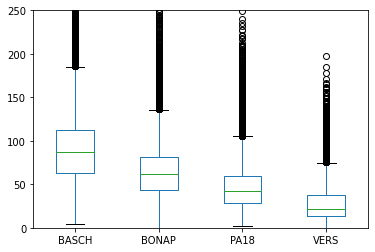

In [48]:
no2.plot(kind='box', ylim=[0,250])

<AxesSubplot:ylabel='Frequency'>

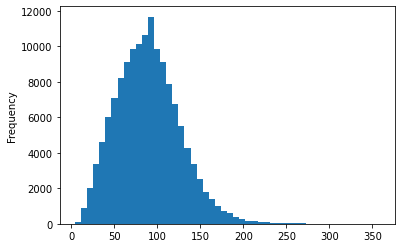

In [49]:
no2['BASCH'].plot(kind='hist', bins=50)

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Trazar la distribución de edad de las pasajeros titánicas.</li>
</ul>
</div>

<AxesSubplot:>

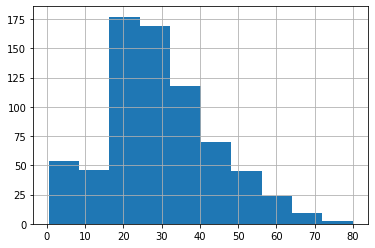

In [50]:
df['Age'].hist()

El gráfico predeterminado (cuando no se especifica `kind`) es un gráfico lineal de todas las columnas:

<AxesSubplot:xlabel='timestamp'>

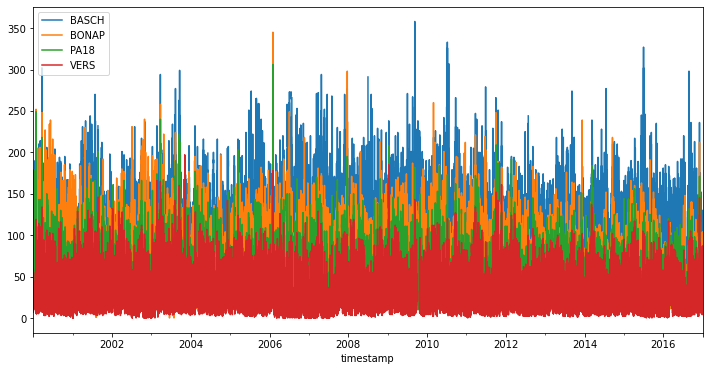

In [53]:
# figsize is a tuple of the width and height of the figure in inches, 
# and dpi is the dots-per-inch (pixel per inch).

no2.plot(figsize=(12,6))

Esto no dice demasiado ..

Podemos seleccionar parte de los datos (por ejemplo, los últimos 500 puntos de datos):

<AxesSubplot:xlabel='timestamp'>

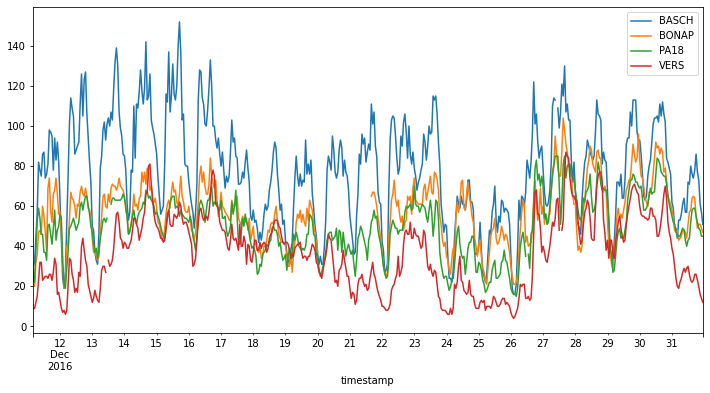

In [54]:
no2[-500:].plot(figsize=(12,6))

O podemos usar algunas funciones de series de tiempo más avanzadas

# 5. Selecting and filtering data

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. <br><br> We now have to distuinguish between:

 <ul>
  <li> selección por ** etiqueta ** </li>
  <li> selección por ** posición ** </li>
</ul>
</div>

In [55]:
df = pd.read_csv("data/titanic.csv")

### `df[]` provides some convenience shortcuts

Para un DataFrame, la indexación básica selecciona las columnas.

Seleccionar una sola columna:

In [56]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

o varias columnas:

In [57]:
df[['Age', 'Fare']]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
...,...,...
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000
890,32.0,7.7500


Pero, cortar accede a las filas:

In [59]:
df[10:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


### Systematic indexing with `loc` and `iloc`

Al usar `[]` como arriba, solo puede seleccionar de un eje a la vez (filas o columnas, no ambos). Para una indexación más avanzada, tiene algunos atributos adicionales:

* `loc`: selection by label
* `iloc`: selection by position

In [60]:
df = df.set_index('Name')

In [61]:
df.loc['Bonnell, Miss. Elizabeth', 'Fare']

26.55

In [72]:
df.loc['Bonnell, Miss. Elizabeth':'Andersson, Mr. Anders Johan', :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Bonnell, Miss. Elizabeth",12,1,1,female,58.0,0,0,113783,26.550,C103,S
"Saundercock, Mr. William Henry",13,0,3,male,20.0,0,0,A/5. 2151,8.050,NaN,S
"Andersson, Mr. Anders Johan",14,0,3,male,39.0,1,5,347082,31.275,NaN,S


Seleccionar por posición con `iloc` funciona de manera similar a indexar matrices numpy:

In [73]:
df.iloc[0:2,1:3]

,Survived,Pclass
Name,,
"Braund, Mr. Owen Harris",0,3
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1


Los diferentes métodos de indexación también se pueden utilizar para asignar datos:

In [74]:
df.loc['Braund, Mr. Owen Harris', 'Survived'] = 100

In [75]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,100,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C
"Dooley, Mr. Patrick",891,0,3,male,32.0,0,0,370376,7.7500,NaN,Q


### Boolean indexing (filtering)

A menudo, desea seleccionar filas en función de una determinada condición. Esto se puede hacer con 'indexación booleana' (como una cláusula where en SQL) y es comparable a numpy.

El indexador (o máscara booleana) debe ser unidimensional y de la misma longitud que la cosa que se indexa.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S,"(70, 80]"


In [77]:
df[df['Fare'] > 50]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Fortune, Mr. Charles Alexander",28,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...
"Sage, Miss. Dorothy Edith ""Dolly""",864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S
"Roebling, Mr. Washington Augustus II",868,0,1,male,31.0,0,0,PC 17590,50.4958,A24,S
"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",872,1,1,female,47.0,1,1,11751,52.5542,D35,S
"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",880,1,1,female,56.0,0,1,11767,83.1583,C50,C


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
<li> Según el conjunto de datos titánico, seleccione todas las filas para los pasajeros masculinos y calcule la edad media de esos pasajeros. Haz lo mismo con las pasajeras </li>
</ul>
</div>

In [78]:
df = pd.read_csv("data/titanic.csv")

In [79]:
df[df['Sex'] == 'male']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [82]:
df.loc[df['Sex'] == 'male', 'Fare'].mean()

25.523893414211443

In [83]:
df.loc[df['Sex'] == 'female', 'Fare'].mean()

44.47981783439491

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li> Según el conjunto de datos del Titanic, ¿cuántos pasajeros mayores de 70 viajaban en el Titanic? </li>
</ul>
</div>

In [86]:
df[df['Age'] > 70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [87]:
(df['Age'] > 70).sum()

0      False
1      False
2      False
3      False
       ...  
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

# 6. The group-by operation

### Un poco de 'teoria': the groupby operation (split-apply-combine)

In [88]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
...,...,...
5,C,15
6,A,10
7,B,15
8,C,20


### Recap: aggregating functions

Al analizar datos, a menudo calcula estadísticas de resumen (agregaciones como la media, el máximo, ...). Como hemos visto antes, podemos calcular fácilmente dicha estadística para una serie o columna usando uno de los muchos métodos disponibles. Por ejemplo:

In [89]:
df['data'].sum()

90

Sin embargo, en muchos casos, sus datos tienen ciertos grupos y, en ese caso, es posible que desee calcular esta estadística para cada uno de los grupos.

Por ejemplo, en el marco de datos anterior `df`, hay una columna "clave" que tiene tres valores posibles: "A", "B" y "C". Cuando queramos calcular la suma de cada uno de esos grupos, podemos hacer lo siguiente:

In [90]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


Esto se vuelve muy detallado cuando se tienen varios grupos. Puede hacer lo anterior un poco más fácil recorriendo los diferentes valores, pero aún así, no es muy conveniente trabajar con él.

Lo que hicimos anteriormente, aplicando una función en diferentes grupos, es una "operación de grupo", y pandas proporciona una funcionalidad conveniente para esto.

### Groupby: applying functions per group


El concepto de "agrupar por": queremos **aplicar la misma función en subconjuntos de su marco de datos, en función de alguna clave para dividir el marco de datos en subconjuntos**

Esta operación también se conoce como la operación "dividir-aplicar-combinar", que incluye los siguientes pasos:

* **split ** los datos en grupos según algunos criterios
* **apply ** una función a cada grupo de forma independiente
* **combine ** los resultados en una estructura de datos

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

En lugar de hacer el filtrado manual como arriba

    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas proporciona el método `groupby` para hacer exactamente esto:

In [95]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


In [96]:
df.groupby('key').aggregate(np.sum)# 'sum'

,data
key,
A,15
B,30
C,45


Y hay muchos más métodos disponibles.

In [97]:
df.groupby('key')['data'].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

### Application of the groupby concept on the titanic data

Volvemos a los datos de supervivencia de los pasajeros en el titanic:

In [98]:
df = pd.read_csv("data/titanic.csv")

In [99]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li> Vuelva a calcular la edad promedio para cada sexo, pero ahora usando groupby. </li>
</ul>
</div>

In [100]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li> Calcule la tasa de supervivencia promedio de todos los pasajeros. </li>
</ul>
</div>

In [102]:
df['Survived'].sum() / len(df['Survived'])
# df['Survived'].mean()

0.3838383838383838

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li> Calcule esta tasa de supervivencia para todos los pasajeros menores de 25 años (recuerde: filtrado / indexación booleana). </li>
</ul>
</div>

In [105]:
df25 = df[df['Age'] <= 25]
df25['Survived'].sum() / len(df25['Survived'])

0.4119601328903654

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li> ¿Cuál es la diferencia en la tasa de supervivencia entre los sexos? </li>
</ul>
</div>

In [108]:
# df.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li> ¿O en qué se diferencia entre las diferentes clases? Haga un diagrama de barras que visualice la tasa de supervivencia de las 3 clases. </li>
</ul>
</div>

<AxesSubplot:xlabel='Pclass'>

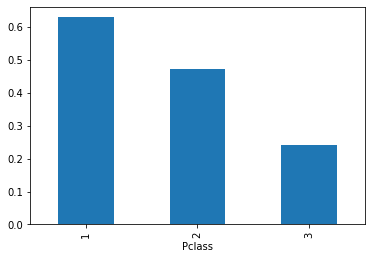

In [109]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li> Haga un diagrama de barras para visualizar la tarifa promedio que pagan las personas según su edad. La columna de edad está dividida en clases separadas usando la función `pd.cut` como se indica a continuación. </li>
</ul>
</div>

In [111]:
df['AgeClass'] = pd.cut(df['Age'], bins=np.arange(0,90,10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.0, 30.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.0, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.0, 30.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.0, 40.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10.0, 20.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(20.0, 30.0]"
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q,"(30.0, 40.0]"


In [114]:
df.groupby('AgeClass')['Fare'].mean()

AgeClass
(0, 10]     30.434439
(10, 20]    29.529531
(20, 30]    28.306719
(30, 40]    42.496100
(40, 50]    41.163181
(50, 60]    44.774802
(60, 70]    45.910782
(70, 80]    25.936680
Name: Fare, dtype: float64

# 7. Working with time series data

In [120]:
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)
no2

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
...,...,...,...,...
2016-12-31 20:00:00,73.0,51.0,49.0,20.0
2016-12-31 21:00:00,61.0,51.0,48.0,16.0
2016-12-31 22:00:00,57.0,49.0,45.0,14.0
2016-12-31 23:00:00,51.0,47.0,45.0,12.0


Cuando nos aseguramos de que el DataFrame tenga un `DatetimeIndex`, la funcionalidad relacionada con la serie temporal estará disponible:

In [121]:
no2.index

DatetimeIndex(['2000-01-01 01:00:00', '2000-01-01 02:00:00',
               '2000-01-01 03:00:00', '2000-01-01 04:00:00',
               '2000-01-01 05:00:00', '2000-01-01 06:00:00',
               '2000-01-01 07:00:00', '2000-01-01 08:00:00',
               '2000-01-01 09:00:00', '2000-01-01 10:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=149039, freq=None)

La indexación de una serie temporal funciona con cadenas:

In [122]:
no2["2010-01-01 09:00": "2010-01-01 12:00"]

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2010-01-01 09:00:00,31.0,27.0,28.0,14.0
2010-01-01 10:00:00,41.0,31.0,30.0,14.0
2010-01-01 11:00:00,48.0,32.0,33.0,16.0
2010-01-01 12:00:00,63.0,33.0,39.0,19.0


Una característica interesante es la indexación de "cadena parcial", por lo que no es necesario proporcionar la cadena de fecha y hora completa.

P.ej. todos los datos de enero a marzo de 2012:

In [123]:
no2['2012-01':'2012-03']

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2012-01-01 00:00:00,44.0,34.0,32.0,7.0
2012-01-01 01:00:00,56.0,35.0,29.0,9.0
2012-01-01 02:00:00,50.0,36.0,29.0,7.0
2012-01-01 03:00:00,46.0,34.0,22.0,8.0
...,...,...,...,...
2012-03-31 20:00:00,61.0,55.0,29.0,17.0
2012-03-31 21:00:00,46.0,49.0,32.0,14.0
2012-03-31 22:00:00,56.0,41.0,27.0,14.0
2012-03-31 23:00:00,59.0,51.0,29.0,13.0


Se puede acceder a los componentes de fecha y hora desde el índice:

In [124]:
no2.index.hour

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='timestamp', length=149039)

In [125]:
no2.index.year

Int64Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='timestamp', length=149039)

## Converting your time series with `resample`

Un método muy poderoso es **`resample`: convertir la frecuencia de la serie temporal** (por ejemplo, de datos por hora a datos diarios).

Recuerde los datos de la calidad del aire:

In [ ]:
no2.plot()

La serie de tiempo tiene una frecuencia de 1 hora. Quiero cambiar esto a diario:

In [126]:
no2.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


In [136]:
# Resampling involves changing the frequency of your time series observations. 
# Two types of resampling are: Upsampling: Where you increase the frequency of the samples, 
# such as from minutes to seconds. Downsampling: Where you decrease the frequency of the samples, 
# such as from days to months.

no2.resample('D').mean().head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01,83.173913,53.772727,64.695652,36.521739
2000-01-02,78.708333,59.250000,63.708333,17.166667
2000-01-03,82.333333,73.541667,61.000000,23.083333
2000-01-04,78.500000,73.708333,48.863636,23.791667
2000-01-05,94.291667,90.458333,60.166667,28.214286


Arriba tomo la media, pero al igual que con `groupby` también puedo especificar otros métodos:

In [137]:
no2.resample('D').max().head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01,109.0,62.0,77.0,59.0
2000-01-02,109.0,96.0,78.0,45.0
2000-01-03,120.0,102.0,72.0,37.0
2000-01-04,115.0,107.0,78.0,43.0
2000-01-05,141.0,115.0,82.0,41.0


La cadena para especificar la nueva frecuencia de tiempo: http://pandas.pydata.org/pandas-docs/dev/timeseries.html#offset-aliases Estas cadenas también se pueden combinar con números, por ejemplo, `'10D'`.

Explorando más los datos:

In [141]:
no2.resample('2D').mean().head() # 'A'

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01,80.893617,56.630435,64.191489,26.638298
2000-01-03,80.416667,73.625000,55.195652,23.437500
2000-01-05,95.085106,90.270833,63.416667,28.214286
2000-01-07,92.812500,82.812500,58.687500,NaN
2000-01-09,111.854167,93.708333,87.520833,NaN


In [ ]:
# no2['2012'].resample('D').plot()

In [ ]:
no2.loc['2009':, 'VERS'].resample('M').agg(['mean', 'median'])
# no2.loc['2009':, 'VERS'].resample('M').agg(['mean', 'median']).plot()

<div class="alert alert-success">

<b>EXERCISE</b>: La evolución de los promedios anuales y la media general de todas las estaciones.

 <ul>
  <li> Utilice `resample` y` plot` para trazar los promedios anuales de las diferentes estaciones. </li>
  <li> La media general de todas las estaciones se puede calcular tomando la media de las diferentes columnas (`.mean(axis=1)`). </li>
</ul>
</div>

In [146]:
no2.mean(axis=1)
# no2.mean(axis=1).resample('A').mean().plot(color='k', linestyle='--', linewidth=4)

timestamp
2000-01-01 01:00:00    73.333333
2000-01-01 02:00:00    70.750000
2000-01-01 03:00:00    65.500000
2000-01-01 04:00:00    53.750000
                         ...    
2016-12-31 20:00:00    48.250000
2016-12-31 21:00:00    44.000000
2016-12-31 22:00:00    41.250000
2016-12-31 23:00:00    38.750000
Length: 149039, dtype: float64

<div class="alert alert-success">

<b>EXERCISE</b>: how does the *typical monthly profile* look like for the different stations?

 <ul>
  <li> Agregue una columna "mes" al marco de datos. </li>
  <li> Agrupe por mes para obtener los promedios mensuales típicos de los diferentes años. </li>
</ul>
</div>

Primero, agregamos una columna al marco de datos que indica el mes (valor entero de 1 a 12):

In [ ]:
no2['month'] = no2.index.month

Ahora, podemos calcular la media de cada mes durante los diferentes años:

In [ ]:
no2.groupby('month').mean()

In [ ]:
no2.groupby('month').mean().plot()

<div class="alert alert-success">

<b>EXERCISE</b>: El perfil diurno típico de las diferentes estaciones

 <ul>
  <li> Al igual que para el mes, ahora puede agrupar por hora del día. </li>
</ul>
</div>

In [ ]:
no2.groupby(no2.index.hour).mean().plot()

<div class="alert alert-success">

<b>EXERCISE</b>: ¿Cuál es la diferencia en el perfil diurno típico entre los días de semana y de fin de semana para la estación 'BASCH'?

 <ul>
  <li> Agregue una columna "día de la semana" que defina los diferentes días de la semana. </li>
  <li> Agregue una columna "fin de semana" que defina si un día es fin de semana (es decir, los días 5 y 6) o no (verdadero / falso). </li>
  <li> Puede agrupar en varios elementos al mismo tiempo. En este caso, necesitaría agrupar por fin de semana / día de la semana y hora del día. </li>
</ul>
</div>

Agregue una columna que indique el día de la semana:

In [147]:
no2.index.weekday?

In [149]:
no2['weekday'] = no2.index.weekday
no2

,BASCH,BONAP,PA18,VERS,weekday
timestamp,,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0,5
2000-01-01 02:00:00,104.0,60.0,77.0,42.0,5
2000-01-01 03:00:00,97.0,58.0,73.0,34.0,5
2000-01-01 04:00:00,77.0,52.0,57.0,29.0,5
...,...,...,...,...,...
2016-12-31 20:00:00,73.0,51.0,49.0,20.0,5
2016-12-31 21:00:00,61.0,51.0,48.0,16.0,5
2016-12-31 22:00:00,57.0,49.0,45.0,14.0,5
2016-12-31 23:00:00,51.0,47.0,45.0,12.0,5


Agregue una columna que indique semana / fin de semana

In [150]:
no2['weekend'] = no2['weekday'].isin([5, 6])
no2

,BASCH,BONAP,PA18,VERS,weekday,weekend
timestamp,,,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0,5,True
2000-01-01 02:00:00,104.0,60.0,77.0,42.0,5,True
2000-01-01 03:00:00,97.0,58.0,73.0,34.0,5,True
2000-01-01 04:00:00,77.0,52.0,57.0,29.0,5,True
...,...,...,...,...,...,...
2016-12-31 20:00:00,73.0,51.0,49.0,20.0,5,True
2016-12-31 21:00:00,61.0,51.0,48.0,16.0,5,True
2016-12-31 22:00:00,57.0,49.0,45.0,14.0,5,True
2016-12-31 23:00:00,51.0,47.0,45.0,12.0,5,True


Ahora podemos agrupar por la hora del día y el fin de semana (o usar `pivot_table`):

In [153]:
data_weekend = no2.groupby(['weekend', no2.index.hour]).mean()
data_weekend.head()

BASCH      BONAP       PA18       VERS  weekday
weekend timestamp                                                     
False   0          62.683270  49.385498  41.966667  25.601584      2.0
        1          51.150107  41.151063  37.160479  22.988806      2.0
        2          44.088698  36.148094  33.933945  21.275548      2.0
        3          43.542551  33.898973  32.919567  20.782081      2.0
        4          53.439094  35.102370  35.566087  22.241620      2.0

In [ ]:
data_weekend_BASCH = data_weekend['BASCH'].unstack(level=0)
data_weekend_BASCH.head()

In [ ]:
data_weekend_BASCH.plot()

In [ ]:
no2['hour'] = no2.index.hour
no2.pivot_table(columns='weekend', index='hour', values='BASCH')

<div class="alert alert-success">

<b>EXERCISE</b>:¿Cuál es el número de superaciones de los valores horarios por encima del límite europeo de 200 µg / m3?

Cuente el número de superaciones de los valores horarios por encima del límite europeo de 200 µg / m3 para cada año y estación después de 2005. Haga un diagrama de barras de los recuentos. ¿Agregue una línea horizontal que indique el número máximo de excedencias (que es 18) permitidas por año?
<br><br>

Hints:

 <ul>
  <li> Cree un nuevo DataFrame, llamado "exceedances", (con valores booleanos) que indique si el umbral se excede o no </li>
  <li> Recuerde que la suma de los valores verdaderos se puede utilizar para contar elementos. Haga esto usando groupby para cada año. </li>
  <li> Se puede agregar una línea horizontal con la función matplotlib `ax.axhline`. </li>
</ul>
</div>

In [ ]:
# re-reading the data to have a clean version
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

In [ ]:
exceedances = no2 > 200

In [ ]:
# group by year and count exceedances (sum of boolean)
exceedances = exceedances.groupby(exceedances.index.year).sum()

In [ ]:
ax = exceedances.loc[2005:].plot(kind='bar')
ax.axhline(18, color='k', linestyle='--')

# 9. Que no hablamos?

- Concatenación de datos: `pd.concat`
- Fusionar y unir datos: `pd.merge`
- Cambio de forma de datos: `pivot_table`,` melt`, `stack`,` unstack`
- Trabajar con datos faltantes: `isnull`,` dropna`, `interpolate`, ...


## Further reading

* Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/